In [0]:
try:
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
from IPython.display import clear_output

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [0]:
class_names = ['Tshirt/Top', 'Trouser', 'Pullover', "Dress", 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

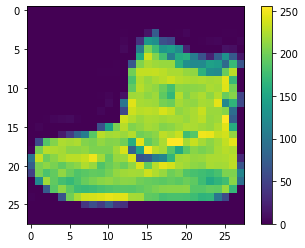

In [10]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
X_train = X_train/255.0
X_test = X_test/255.0

In [15]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2307 - accuracy: 0.9127
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2242 - accuracy: 0.9169
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2157 - accuracy: 0.9204
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2085 - accuracy: 0.9208
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2033 - accuracy: 0.9240
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1957 - accuracy: 0.9282
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1912 - accuracy: 0.9281
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1876 - accuracy: 0.9301
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1815 - accuracy: 0.9325
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.176

In [19]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 0s 2ms/step - loss: 0.4137 - accuracy: 0.8887
Test accuracy:  0.888700008392334


In [0]:
predictions = model.predict(X_test)

In [30]:
predictions[0].argmax()

9

In [31]:
y_test[0]

9

In [0]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['Tshirt/Top', 'Trouser', 'Pullover', "Dress", 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.bwr)
    plt.title('Expected: '+label)
    plt.xlabel('Guess: '+guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()

def get_no():
    while True:
        num = input('Pick any number: ')
        if num.isdigit():
            num = int(num)
            if 0<=num<=1000:
                return int(num)
        else:
            print('Please try again')

Pick any number: 104


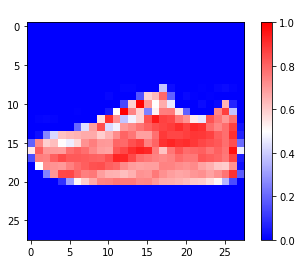

In [49]:
num = get_no()
image = X_test[num]
label = y_test[num]
predict(model, image, label)